# (ADA) Homework 1: Scoring the Language Model Olympics

---

By the end of this homework, we expect you to be able to:

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up noisy real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways;
- Create meaningful visualizations to analyze the data;
- Communicate your findings in a clear and concise manner

---

**Important Dates.**

- Homework release: Fri 04 Oct 2024
- Homework due: Sat 18 Oct 2024, 23:59
- Grade release: Mon 04 Nov 2024

**Some rules**

- You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.
- Make sure you use the data folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)
- Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.
- For questions containing the /Discuss:/ prefix, answer not with code, but with a textual explanation (in markdown).
- Back up any hypotheses and claims with data, since this is an important aspect of the course.
- Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. If there are multiple notebooks present, we will not grade anything.
- We will not run your notebook for you! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a fully-run and evaluated notebook. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

**A Note on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating. Fortunately, our job is not to police, but rather to educate! So, please consider the following:
- Presumably, you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!
- Some of the TAs on this course literally published many works on detecting machine-generated text.
---

## Context

Context
AI is booming! Newspapers, influencers, and your relatives all agree that AI is important. But while almost everyone agrees that AI is the future, much is unclear about what that future looks like…

Freshly graduated from the EPFL, you are hired by the Swiss government to advise on a large-scale “AI integration” initiative code-named **"NEUTRALITY"** (Navigating Efficient Upgrades Through Robust Artificial Learning Integration Techniques Yearly). Convinced by the stunning progress in language modeling, the government would like to battle the growing shortages in the education sector by using LMs. Your job description: investigate which LMs might be best suited!

You are given the results of three LMs on the [“Massive Multitask Language Understanding (MMLU)”](https://arxiv.org/abs/2009.03300) dataset to compare. This famous dataset consists of 57 subjects with multiple-choice questions, covering diverse subjects like mathematics, computer science, history, and law. Most providers of state-of-the-art LMs use this dataset to showcase the versatility of their latest models. Unfortunately, Horta-Ribeiro, the intern responsible for collecting the results, didn’t take EPFL’s famous ADA course. As a result, the collected datasets are slightly corrupted.

### A very brief primer on Language Models
Language models (LMs) are sophisticated statistical models designed to understand and generate human-like text. At their core, LMs are trained to predict the most likely continuation of a given input text. For example, given the input "The cat sat on the," an LM might predict "mat" as a likely continuation.
LMs are trained on vast text samples from various sources, including books, websites, and social media. This extensive training allows them to capture patterns and relationships in language, enabling them to generate coherent and contextually appropriate text across a wide range of topics and styles.

While LMs can produce text that appears to be written by intelligent humans, it's important to note that their capabilities can diverge from human intelligence in unexpected ways. They may sometimes generate factually incorrect information or struggle with complex reasoning tasks.

Two key concepts in understanding LMs are:
1. **Tokens**: LMs process text using "tokens" rather than individual characters. Tokens can be words, parts of words, or punctuation marks. For example, the sentence "I love AI!" might be tokenized as ["I", "love", "AI", "!"]. Tokenization is the first step in both training and using an LM.
2. **Context**: The input text provided to an LM is called the "context." This context informs the model's predictions or generations. A longer or more specific context often leads to more accurate and relevant outputs.

[See: Wikipedia entry on language models](https://en.wikipedia.org/wiki/Large_language_model)

###  Files for this assignment
This assignment is divided into three tasks, each of which should bring you a step closer to providing a recommendation toward project NEUTRALITY’s objectives:

- **Task 1**: Inspecting the results and getting your first model ranking
- **Task 2**: Inspecting the underlying data used to generate the results for possible biases
- **Task 3**: Learning about tokens and providing a final recommendation


```
📁 PROJECT_NEUTRALITY
│
├── 📄 analysis.ipynb (the file you're currently reading!)
├── 📄 requirements.txt (install into your environment)
│
├── 📁 task_1
├── 📁 task_2
└── 📁 task_2.5
```   
 

In [1]:
# please make sure you install the packages listed in the requirements.txt file in your environment!
# using pip
# pip install -r requirements.txt
#
# using Conda:
# conda create --name <env_name> --file requirements.txt
#
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind
import seaborn as sns

## Task 1 (18 points): What's in an average anyway?

The files needed to complete task 1 can be found in the folder "`data/task_1/`:
```
task_1/
│
├── mmlu_data/
│   └── test.csv
│
└── lm_scores/
    ├── lm_X.csv
    ├── lm_Y.csv
    └── lm_Z.csv
```

We will start by loading, (manually) inspecting, and cleaning the data. Although it doesn't seem "glamorous" (nor is it particularly fun...) - manually inspecting data is extremely important! In fact, it's one of the few things most AI and Data Science researchers agree on :). Next, we will take a first pass on ordering our Olympic podium between three LMs.

### 1.1 (1 pt)
 
Load the subfiles contained in the `mmlu_data` and `lm_scores` folders into separate dataframes:
- `df_test`
- `df_x`
- `df_y`
- `df_z`

for each, print their sizes.

In [2]:
df_test = pd.read_csv('./task_1/mmlu_data/test.csv')
df_x = pd.read_csv('./task_1/lm_scores/lm_X.csv')
df_y = pd.read_csv('./task_1/lm_scores/lm_Y.csv')
df_z = pd.read_csv('./task_1/lm_scores/lm_Z.csv')

print('The corresponding sizes are :')

print(f'df_test shape :  {df_test.shape}')
print(f'  df_x shape :   {df_x.shape}')
print(f'  df_y shape :   {df_y.shape}')
print(f'  df_z shape :   {df_z.shape}')


The corresponding sizes are :
df_test shape :  (14042, 8)
  df_x shape :   (13882, 2)
  df_y shape :   (13978, 2)
  df_z shape :   (13923, 2)


### 1.2 (4 pt)
Unfortunately, LMs don't always output the format we want. In the column `result`, the value should be one of A, B, C, or D. 

A. For each of the LM score dataframes, use a `value_counts()` operation and print the results. 

B. /Discuss:/ Inspect the results and describe the types of answer formats you see. Besides the "expected" case, you should be able to find at least four unexpected formats.

A. Let's first start by investigating the different results we've got for lm_x

In [3]:
# A - lm_x
print("Results for lm_x : \n")
print(pd.Series(df_x['result']).value_counts())

Results for lm_x : 

result
A                                                                                    2733
A                                                                                    1657
B                                                                                    1412
Answer: A                                                                            1398
C                                                                                    1134
                                                                                     ... 
(–3, 2), so the answer is C                                                             1
sweet, so the answer is B                                                               1
remembering how to tie a tie, so the answer is B                                        1
anger, so the answer is A                                                               1
creating insurmountable obstacles to the founding of factions, so the an

It seems that many other outputs are present within our result column. Let's see how bad it is using the nunique() method that counts the number of unique values for a given dataframe :

In [4]:
# A - lm_x
print("The number of unique values within the result column for lm_x is :",df_x['result'].nunique(), " > |A,B,C,D|")

The number of unique values within the result column for lm_x is : 145  > |A,B,C,D|


Same thing for the remaining language models:

In [5]:
# A - lm_y
print("Results for lm_y : \n")
print(pd.Series(df_y['result']).value_counts())
print("\nThe number of unique values within the result column for lm_y is :",df_y['result'].nunique(), " > |A,B,C,D|")

Results for lm_y : 

result
D                                                                                                                 2894
Answer: D                                                                                                         1718
C                                                                                                                 1701
B                                                                                                                 1240
D                                                                                                                 1145
                                                                                                                  ... 
4, so the answer is D                                                                                                1
FindName (["Andrea", "Ben", "Chris"], "Ben"), so the answer is C                                                     1
had some degree of a

In [6]:
# A - lm_z
print("Results for lm_z : \n")
print(pd.Series(df_z['result']).value_counts())
print("\nThe number of unique values within the result column for lm_z is :",df_z['result'].nunique(), " > |A,B,C,D|")

Results for lm_z : 

result
D                                                                                       2257
C                                                                                       2191
B                                                                                       2127
A                                                                                       2060
Answer: D                                                                                777
                                                                                        ... 
III and IV only, so the answer is D                                                        1
have a positive value of equal magnitude on its capital account., so the answer is B       1
a recession., so the answer is A                                                           1
decreasing SRAS with constant AD., so the answer is B                                      1
Voting participation for racial minority v

145, 141 and 560 are respectively the number of unique results we have for each one of our language models. Enormous compared to the expected 4 choices, isn't it?
But in order to be more rigourous in our analysis, let's put some scaling into this : 

In [7]:
# Definition of a method that computes the ratio of invalid values given a dataframe and the expected results
def compute_invalid_format_ratio(df, expected_values):
    valid_values_indices = df['result'].isin(expected_values)
    invalid_values = df[~valid_values_indices]
    return (len(invalid_values)/len(df['result'])) *100

# Results
print("The ratio of invalid results of lm_x is : ",compute_invalid_format_ratio(df_x,['A','B','C','D']),"%")
print("\nThe ratio of invalid results of lm_y is : ",compute_invalid_format_ratio(df_y,['A','B','C','D']),"%")
print("\nThe ratio of invalid results of lm_z is : ",compute_invalid_format_ratio(df_z,['A','B','C','D']),"%")

The ratio of invalid results of lm_x is :  53.87552225904049 %

The ratio of invalid results of lm_y is :  51.04449849763915 %

The ratio of invalid results of lm_z is :  37.98032033326151 %


Although lm_z had the maximum number of unique values, it holds the lowest rate of invalid results among the 3. Interesting! 

B. Among the invalid results, we have :

* Relatively Long texts :  They usually include the justification to the answer that will be given at the end of the sequence.
* Text following the pattern [Answer: {A,B,C,D}+]
* Null/NA values 
* Valid answers including an extra space. Example : 'A ' != 'A'
* Uncertainty/Over-Confidence answers. Examples : 'None of the above', 'Not Sure'
...

### 1.3 (5 pt)
Oh oh... That doesn't look great. Simply dropping all invalid answers seems overly wasteful, yet fixing all of these looks like a mess! Instead, let's focus for now on fixing just those answers of length < 10 characters that require only a single `str.replace()` operation. 

For example, if the answer looks like `--A--`, we could fix this by using the following simple function:

```
def clean_answer(s, pattern='-'):
    return str(s).replace(pattern, '')

dirty_answer = '--A--'
clean_answer = clean_answer(dirty_answer)
```

A. Filter the three score dataframes to include only answers with less than 10 characters. Make a deep copy of the dataframes as you filter them.

B. Modify the `clean_answer()` example function to clean the answers in the filtered data frames using the `apply()` functionality. Finally, make sure **all remaining answers are one of `A, B, C, or D`.**

C. /Discuss:/ Compare the sizes of the original and filtered data frames. What do you see? Why might this be a problem?

In [8]:
# A
    # Function that performs a deep copy of the given dataframe and returns rows having an answer shorter than 10 characters
def fewer_than_10_chars(df):
    df_copy =df.copy(deep=True)
    valid_indices =df_copy['result'].str.len()<10
    return df_copy[valid_indices]

    # Application of the method to the different dataframes
df_x_less_than_10= fewer_than_10_chars(df_x)
df_y_less_than_10 =fewer_than_10_chars(df_y)
df_z_less_than_10 =fewer_than_10_chars(df_z)

In [9]:
# B

    # Method that cleans a given string from a pattern
def clean_answer(s,pattern):
    return str(s).replace(pattern,'')

    # Method that cleans the dataframe
def clean_dataframe(df, pattern):
        # Handling of 'Not Sure'
    clean_df = df[df['result']!='Not Sure']
        # Cleaning results having 'Answer : ' as a prefix . We use .loc to avoid ambiguity and warnings as well (it's considered a good practice)
    clean_df.loc[:,'result'] =clean_df['result'].apply(lambda answer: clean_answer(answer, pattern))
        # Handling unnecessary spaces
    clean_df.loc[:,'result']= clean_df['result'].str.strip()
    return clean_df

    # Cleaning
clean_df_x_less_than_10 =clean_dataframe(df_x_less_than_10, 'Answer: ')
clean_df_y_less_than_10 =clean_dataframe(df_y_less_than_10, 'Answer: ')
clean_df_z_less_than_10= clean_dataframe(df_z_less_than_10, 'Answer: ')

    # Verification
print("The number of unique values within the result column for lm_x is :",clean_df_x_less_than_10['result'].nunique(), " = |A,B,C,D|")
print("\nThe number of unique values within the result column for lm_y is :",clean_df_y_less_than_10['result'].nunique(), " = |A,B,C,D|")
print("\nThe number of unique values within the result column for lm_z is :",clean_df_z_less_than_10['result'].nunique(), " = |A,B,C,D|")


The number of unique values within the result column for lm_x is : 4  = |A,B,C,D|

The number of unique values within the result column for lm_y is : 4  = |A,B,C,D|

The number of unique values within the result column for lm_z is : 4  = |A,B,C,D|


C. /Discuss:/

In [10]:
    # Compute the proportion of rows we lost during the filtering/cleaning procedure
print("After cleaning, the loss in rows for df_x is :",(len(df_x)-len(clean_df_x_less_than_10))*100/len(df_x),"%")
print("After cleaning, the loss in rows for df_y is :",(len(df_y)-len(clean_df_y_less_than_10))*100/len(df_y),"%")
print("After cleaning, the loss in rows for df_z is :",(len(df_z)-len(clean_df_z_less_than_10))*100/len(df_z),"%")

After cleaning, the loss in rows for df_x is : 3.212793545598617 %
After cleaning, the loss in rows for df_y is : 3.054800400629561 %
After cleaning, the loss in rows for df_z is : 8.403361344537815 %


We observe a significant loss in rows after our filtering/cleaning procedure, particularly in df_z, which shows a loss of 8.40%, while df_x and df_y experience smaller losses of 3.21% and 3.05%, respectively. 
This could be problematic as dropping a substantial portion of the data may introduce bias into our analysis and lead to incorrect conclusions. For instance, if the filtering disproportionately affects a specific class of questions, it could compromise the overall data quality and underrepresent certain aspects of the dataset. Additionally, the wrong formats may itself carry valuable information, and by removing rows at different rates across datasets, we risk omitting critical information that could be important for our analysis. This uneven data reduction could distort the results and affect the integrity of the conclusions drawn especially if we are planning to perform some comparisons afterwards.

### 1.4 (3 pt)

Now that our answer columns are nicely formatted, let's take a look at model performance:

A. Both the `MMLU` dataframes and the language model score data frames have the columns `question_id`. For each of the language model score data frames, use an inner join operation with the `df_test` dataframe on the `question_id` column.

B. Add a new column to each of the resulting dataframes called `correct`, that checks if the model's answer in `result` is the same as the expected answer in the column `answer`. Then, print the average score of each model.

In [11]:
# A
    # Perform the different joins with the test dataset
clean_df_x_with_reference =pd.merge(clean_df_x_less_than_10, df_test,how='inner',on='question_id')
clean_df_y_with_reference =pd.merge(clean_df_y_less_than_10, df_test,how='inner',on='question_id')
clean_df_z_with_reference= pd.merge(clean_df_z_less_than_10, df_test,how='inner',on='question_id')

In [12]:
# B
    # Correct can be seen as a simple boolean value that is equal to 1/True if answer and result match and 0/False if not
clean_df_x_with_reference['correct']=(clean_df_x_with_reference['answer']==clean_df_x_with_reference['result']) 
clean_df_y_with_reference['correct']=(clean_df_y_with_reference['answer']==clean_df_y_with_reference['result']) 
clean_df_z_with_reference['correct']=(clean_df_z_with_reference['answer']==clean_df_z_with_reference['result']) 


In [13]:
# B

    # Method to compute the accuracy
def compute_accuracy(df):
    return sum(df['correct'])*100/len(df['correct'])

    # Results
print("The average accuracy on the cleaned version of df_x is :", compute_accuracy(clean_df_x_with_reference),"%")
print("The average accuracy on the cleaned version of df_y is :", compute_accuracy(clean_df_y_with_reference),"%")
print("The average accuracy on the cleaned version of df_z is :", compute_accuracy(clean_df_z_with_reference),"%")

The average accuracy on the cleaned version of df_x is : 76.74903245013397 %
The average accuracy on the cleaned version of df_y is : 74.58490148328536 %
The average accuracy on the cleaned version of df_z is : 66.3294911001333 %


### 1.5 (5 pt)

Hmmm, something doesn't seem quite right. Let's investigate how "balanced" this dataset is:

A. For each of the 57 subjects in the MMLU, compare the number of questions answered by each model. Print the subjects for which there is a more than 10% difference.

B. Propose and implement a reasonable way to rebalance the results. (e.g., while throwing away 100% of the results perfectly rebalances the results, it is not reasonable).

C. Finally, print the updated accuracy on the rebalanced data.

**hint:**:
- (A) For a given subject, let model X and model Y have answered 181 and 200 questions respectively. You can consider this a 10% difference from the perspective of X since: (200 - 181) / 181 > 0.10

In [14]:
# A

    # The idea here is to build a dataframe that will contain the number of answered questions by each model at the different subjects
def build_answer_count_df(df_x,df_y,df_z):

        # In an analog way to what we usually do in sql, we group the data points by subject and then proceed to their count 
    answer_count_x=pd.DataFrame(df_x.groupby(['subject']).size())
    answer_count_y=pd.DataFrame(df_y.groupby(['subject']).size())
    answer_count_z=pd.DataFrame(df_z.groupby(['subject']).size())

        # Since we're not sure if all subjects are now present in each one of the datasets after the cleaning procedure, 
        # we decided to perform an outer join on the subject column to be sure we don't miss out on any of the subjects  
    answer_count = answer_count_x.merge(answer_count_y, on='subject',how='outer').merge(answer_count_z, on='subject',how='outer')

        # Renaming of the columns
    answer_count.columns= ['lm_x','lm_y','lm_z']

        # Reset of the index so that subject can be a regular column
    answer_count =answer_count.reset_index()

        # Definition of our difference measure
    def relative_difference(a,b):
        return abs(a-b)*100/min(a,b)

        # Since we have three values to compare, we chose to focus on the worst case scenario (maximum relative difference of all possible pairs)
    answer_count['maximum_difference']=answer_count.apply(lambda row: 
        relative_difference(min(row['lm_x'],row['lm_y'],row['lm_z']),max(row['lm_x'],row['lm_y'],row['lm_z'])),axis=1)
    
    return answer_count


# Results time!! List of subjects having more than 10% difference
answer_count_before_balancing = build_answer_count_df(clean_df_x_with_reference, clean_df_y_with_reference, clean_df_z_with_reference)
print("List of subjects having more than 10% difference :")
answer_count_before_balancing[answer_count_before_balancing['maximum_difference']>10]


List of subjects having more than 10% difference :


,subject,lm_x,lm_y,lm_z,maximum_difference
6,college chemistry,96,98,84,16.666667
7,college computer science,97,98,84,16.666667
11,computer security,95,98,87,12.643678
16,formal logic,109,123,113,12.844037
22,high school geography,195,193,176,10.795455
36,logical fallacies,154,136,147,13.235294
40,medical genetics,97,98,89,10.112360
42,moral disputes,329,304,250,31.600000
43,moral scenarios,737,865,774,17.367707


B.

A possible solution to the balance issue while preventing significant data loss is to choose 10% as our maximum permitted difference ratio.

In other words, for each one of our subjects: $[1.1 ~min_{lm}(answerCount(subject,lm))]$ is our limit. Every answer that comes above that limit will be randomly dropped (for the given subject).

In [15]:
# B

# Add the limit to our answer_count_before_balancing dataframe (110% of the minimum value)
answer_count_before_balancing['limit'] =(1.1*answer_count_before_balancing[['lm_x','lm_y','lm_z']].min(axis=1)).astype(int)


# Main function that balances a given source_df of a language model and the corresponding answer_count dataframe
def balance_data(lm, source_df, answer_count):
    
    balanced_df =source_df.copy()
    
        # Loop through subjects with a maximum difference exceeding 10%
    for subject in answer_count[answer_count['maximum_difference']>10]['subject']:

            # Get the subject's count for the specified model
        subject_count =answer_count.loc[answer_count['subject']==subject,lm].values[0] 
        limit= answer_count.loc[answer_count['subject']==subject,'limit'].values[0]
        
            # Check if the subject count exceeds the limit
        if subject_count>limit:
                # Get the target data for this subject
            target_data=balanced_df[balanced_df['subject'] == subject]
                # Drop the excess rows randomly (We choose a seed to ensure reproducibility)
            excess_rows=target_data.sample(n=subject_count-limit, random_state=42).index
            balanced_df.drop(excess_rows, inplace=True)

    return balanced_df


# Let's do some balancing!
clean_and_balanced_df_x= balance_data('lm_x',clean_df_x_with_reference, answer_count_before_balancing)
clean_and_balanced_df_y= balance_data('lm_y',clean_df_y_with_reference, answer_count_before_balancing)
clean_and_balanced_df_z=balance_data('lm_z',clean_df_z_with_reference, answer_count_before_balancing)


In [16]:
    # Verification
answer_count_after_balancing =build_answer_count_df(clean_and_balanced_df_x,clean_and_balanced_df_y,clean_and_balanced_df_z)
print("The number of subjects having a difference exceeding 10% is:", len(answer_count_after_balancing[answer_count_after_balancing['maximum_difference']>10]))

The number of subjects having a difference exceeding 10% is: 0


Our data is now balanced according to the criteria we stated earlier (the 10% limit)!

In [17]:
    # Data loss check
print("The ratio of lost data in df_x after the balancing procedure is:", (len(clean_df_x_with_reference)-len(clean_and_balanced_df_x))*100/len(clean_df_x_with_reference),"%")
print("The ratio of lost data in df_y after the balancing procedure is:", (len(clean_df_y_with_reference)-len(clean_and_balanced_df_y))*100/len(clean_df_y_with_reference),"%")
print("The ratio of lost data in df_z after the balancing procedure is:", (len(clean_df_z_with_reference)-len(clean_and_balanced_df_z))*100/len(clean_df_z_with_reference),"%")

The ratio of lost data in df_x after the balancing procedure is: 0.5209883894016076 %
The ratio of lost data in df_y after the balancing procedure is: 0.7674710353479448 %
The ratio of lost data in df_z after the balancing procedure is: 0.0 %


We observe that the balancing procedure we chose did not result in some heavy data loss: The percentage of dropped rows compared to the whole dataset does not exceed 1%.

In [18]:
# C
    # We compute the new accuracy
print("The new average accuracy on the balanced version of df_x is :", compute_accuracy(clean_and_balanced_df_x),"%")
print("The new average accuracy on the balanced version of df_y is :", compute_accuracy(clean_and_balanced_df_y),"%")
print("The new average accuracy on the balanced version of df_z is :", compute_accuracy(clean_and_balanced_df_z),"%")

The new average accuracy on the balanced version of df_x is : 76.71704324405208 %
The new average accuracy on the balanced version of df_y is : 74.57425448055328 %
The new average accuracy on the balanced version of df_z is : 66.3294911001333 %


Since few rows compared to the datasets sizes were dropped, the accuracies remained exactly the same. 


In conclusion, our choice of a maximum permitted difference ratio of 10% has several **advantages**. First, it maintains data integrity by ensuring that the majority of the data remains intact. Second, this method promotes balanced representation among subjects, as random dropping of excess answers leads to fairer comparisons. Lastly, it is fairly simple and easy to implement.

Despite these benefits, there are also some **drawbacks**. One major concern is the potential loss of valuable data points, which could negatively impact the insights we gain from the analysis. Additionally, the randomness of dropping answers may introduce variability in the results, complicating the replication of findings. Furthermore, this one-size-fits-all approach may not fully account for the unique characteristics of individual subjects, potentially overlooking important details.

To improve upon this method, we can explore some **possible alternatives**. For instance, using weighted sampling could help us retain more important answers instead of dropping them at random (by assiging a weight proportional to the relative presence of the category when performing the different computations(accuracy...)).Data augmentation techniques could also enhance our dataset while maintaining balance, enabling us to generate synthetic data points based on existing responses.

## Task 2 (26 points): What do you mean A > D > B > C...?

Nice work! Having successfully inspected, cleaned, and rebalanced the provided data, you head over to director of the government's NEUTRALITY project. Ms. Sakota is happy with your work so far, but worried that the sloppy intern might have done more undetected damage. To be sure, she orders a new set of evaluations of all models on both MMLU and another dataset.

After cleaning up and rebalancing, you are left with the concatenated score files in the second folder `task_2`:
```
task_2/
│
└── lm_scores_mmlu.csv
│
└── lm_scores_other.csv
```

Each has a new column called `model_name`, which is one of `X, Y` or `Z`.



_NOTE: **only** use data from `task_2` and `task_2_5` for this assignment! The values in `lm_scores_mmlu.csv` will NOT be the same as the dataframes you finished in task 1. This is due to "randomness" or "temperature" in language model inference. This can slightly shift around generative results. (Conveniently: it also ensures any mistakes made in Task 1 don't propogate further ;) )_

In [19]:
# PROVIDED CODE
df_mmlu = pd.read_csv('task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('task_2/lm_scores_other.csv')

### 2.1 (4 pt)

Let's explore the new results:

A. Compute the mean accuracy and standard errors of each model on both datasets and print the results.

B. Then, show your results in a bar plot using standard errors with a 95% confidence interval around the mean. Make sure the plot is easy to read and well annotated.

C. /Discuss:/ the plot you created: (i) can you say that one of the models is the best? (ii) is there anything that seems odd?

In [20]:
# A

    # Definition of a function that given a dataset and a model name returns the accuracy and standard_error of the model inside the dataset 
def compute_accuracy_and_standard_errors(df,model_name):
    
        # Compute the accuracy (%)
    accuracy=compute_accuracy(df[df['model_name']==model_name])

        # Since the correct column is a Bernoulli random variable of parameter p=E[correct]=accuracy/100,
        # the associated standard error is given by : std_error = sqrt(p(1-p))/sqrt(number_of_answers),
        # We multiplied by 100 to match the accuracy scale.
    standard_error=100*np.sqrt((accuracy/100)*(1 -accuracy/100)/len(df[df['model_name']==model_name]))

    return accuracy,standard_error


    # Computation
        # mmlu
x_accuracy_mmlu,x_std_error_mmlu =compute_accuracy_and_standard_errors(df_mmlu,'X')
y_accuracy_mmlu,y_std_error_mmlu= compute_accuracy_and_standard_errors(df_mmlu,'Y')
z_accuracy_mmlu,z_std_error_mmlu=compute_accuracy_and_standard_errors(df_mmlu,'Z')
        # other
x_accuracy_other,x_std_error_other=compute_accuracy_and_standard_errors(df_other,'X')
y_accuracy_other,y_std_error_other=compute_accuracy_and_standard_errors(df_other,'Y')
z_accuracy_other,z_std_error_other= compute_accuracy_and_standard_errors(df_other,'Z')


    # Results agregation
results = pd.DataFrame(columns=['dataset','model','accuracy','standard_error'])
        # mmlu
results.loc[len(results)]=['mmlu','X',x_accuracy_mmlu, x_std_error_mmlu]
results.loc[len(results)]=['mmlu','Y',y_accuracy_mmlu, y_std_error_mmlu]
results.loc[len(results)] =['mmlu','Z',z_accuracy_mmlu, z_std_error_mmlu]
        # other
results.loc[len(results)] =['other','X',x_accuracy_other, x_std_error_other]
results.loc[len(results)]= ['other','Y',y_accuracy_other, y_std_error_other]
results.loc[len(results)]= ['other','Z',z_accuracy_other, z_std_error_other]

print("The mean accuracy and standard errors of each model evaluated on the different datasets :")
results

The mean accuracy and standard errors of each model evaluated on the different datasets :


,dataset,model,accuracy,standard_error
0,mmlu,X,74.358755,0.403754
1,mmlu,Y,76.154241,0.394034
2,mmlu,Z,65.595075,0.439266
3,other,X,78.797553,0.666674
4,other,Y,72.093642,0.731583
5,other,Z,67.172120,0.765914


B.

Let ($X_1$, $X_2$, $\dots$, $X_n$) represent our accuracy samples, where each $X_i$ is a Bernoulli random variable (correct or incorrect answer).

According to the Central Limit Theorem, as the sample size n becomes large, the sampling distribution of the sample mean $\bar{X_n}$ approaches a normal distribution. 

Mathematically, the CLT states that:
$$
\sqrt{n}\frac{\bar{X}_n-\mathbb{E}(X)}{\sigma}\xrightarrow{d}_{+\infty}\mathcal{N}(0,1)
$$
In other words, for sufficiently large n, the distribution of the sample mean $\bar{X}_n$ becomes approximately normal, regardless of the original distribution of the $X_i$.

Let us assume that the number of samples in our dataset satisfies the condition for applying the CLT.

Given a confidence level of $1-\alpha$, the symmetric confidence interval for the mean of a normal distribution is given by:
$$
I = \left[\bar{X}_n - Z_{\alpha/2} \frac{\sigma}{\sqrt{n}}, \bar{X}_n + Z_{\alpha/2} \frac{\sigma}{\sqrt{n}} \right]
$$
Where $Z_{\alpha/2}$ is the critical value from the standard normal distribution corresponding to the desired confidence level.

For a 95% confidence interval ($\alpha=0.05$), we have:
$$
Z_{\alpha/2} = Z_{0.025} = 1.96
$$
Thus, the confidence interval becomes:
$$
I = \left[\bar{X}_n - 1.96 \frac{\sigma}{\sqrt{n}}, \bar{X}_n + 1.96 \frac{\sigma}{\sqrt{n}} \right]
$$

Since $\bar{X}_n$, $\sigma$, and $n$ are derived from the data, and we have chosen $\alpha = 0.05$, we now have all the variables needed to compute the confidence interval for the mean accuracy.

This interval provides us with a range where we are 95% confident that the true accuracy of the model lies.

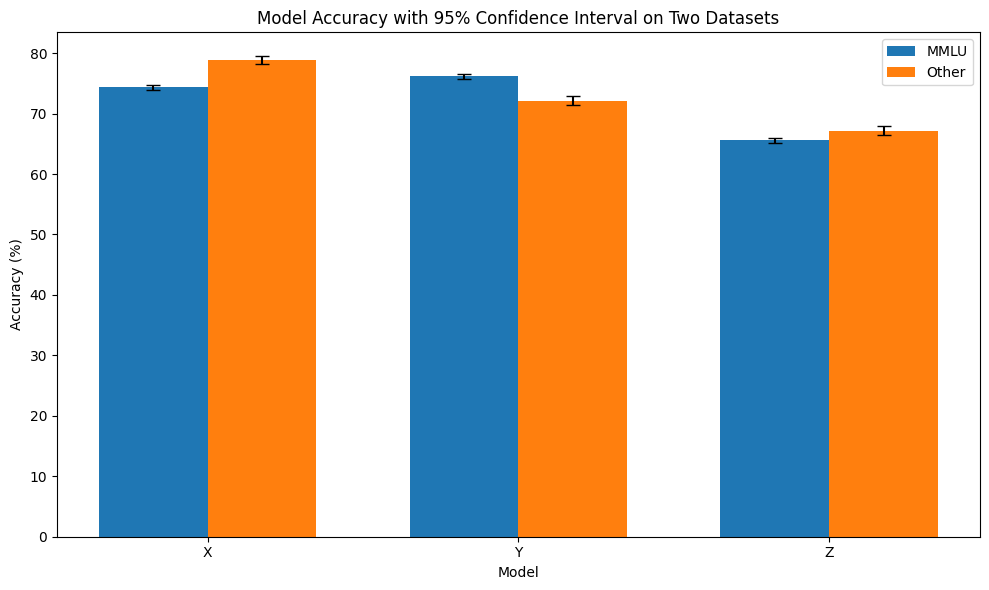

In [21]:
import numpy as np
import matplotlib.pyplot as plt

    # Plot parameters
bar_width =0.35  # Width of the bars
index =np.arange(len(['X','Y','Z'])) 

    # Accuracy values for one of our models and datasets
accuracies_mmlu=[x_accuracy_mmlu,y_accuracy_mmlu,z_accuracy_mmlu]
accuracies_other=[x_accuracy_other,y_accuracy_other,z_accuracy_other]

    # Standard error for each model and dataset
std_errors_mmlu=[x_std_error_mmlu,y_std_error_mmlu,z_std_error_mmlu]
std_errors_other=[x_std_error_other,y_std_error_other,z_std_error_other]

    # Create the figure and axis
fig,ax=plt.subplots(figsize=(10,6))

    # Plot the bars for MMLU
bars_mmlu=ax.bar(index-bar_width/2,accuracies_mmlu, bar_width, 
                   yerr=std_errors_mmlu,label='MMLU',capsize=5)

    # Plot the bars for the other dataset
bars_other= ax.bar(index +bar_width/2,accuracies_other,bar_width, 
                    yerr=std_errors_other,label='Other',capsize=5)

    # Plot config
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracy with 95% Confidence Interval on Two Datasets')
ax.set_xticks(index)
ax.set_xticklabels(['X','Y','Z'])
ax.legend()

    # Result
plt.tight_layout()
plt.show()


C. Based on the data presented, it's challenging to determine the best model among the three. Models X and Y show similar performance in terms of average accuracy and standard deviation across both the "MMLU" and "Other" datasets. Their overlapping 95% confidence intervals indicate that further analysis is needed to distinguish which model is superior.

In contrast, model Z consistently performs worse, as it has significantly lower average accuracy on both datasets, with confidence intervals positioned well below those of models X and Y.

Interestingly, models X and Y each excel in different datasets, as evidenced by their non-overlapping confidence intervals: model X is superior on the "Other" dataset, while model Y performs better on the "MMLU" dataset. This variability complicates our assessment of model Z, which lacks clear performance indicators across the datasets.

Moreover, model X not only achieves the highest accuracy on "Other" but also displays the lowest standard error, while model Y mirrors this trend on the "MMLU" dataset. This suggests that the "Other" dataset, having fewer data points, results in a larger standard error. Overall, additional investigation is necessary to definitively identify the leading model among X, Y, and Z.

### 2.2 (5 pt)

Ms. Sakota has assured you that both datasets contain questions of similar difficulty, so, what could be going on here?

A. What is the distribution of correct answers (A, B, C, D) for each dataset? Create a bar chart to visualize this.

B. Perform a chi-square test at $\alpha = 0.05$, of independence to determine if there's a significant difference in the distribution of correct answers between the two datasets. What do you conclude?

**hints**:
- for (A), keep in mind that df_mmlu and df_other contain the results of all models, i.e., the `question_id` column is duplicated.
- for (A), take care to clearly annotate the bar chart, e.g., title, y-label, legend.
- for (B), clearly state the null hypothesis and alternative hypothesis
- use the `chi2_contingency` function from `scipy.stats`
- format your results from answer (A) as a 2D array

A. 

Here, we are clearly dealing with a multinomial distribution where n(=number_of_questions) rounds has been performed and k(=4) possible outcomes are possible (either A, B, C or D). 

To some extent (n is big enough), the probability/distribution of each one of the outcomes can be seen as its corresponding frequency inside the 'answer' vector.  

In [22]:
# A

    # Compute the number of questions by filtering on a model in order to avoid duplication
questions_count_mmlu =len(df_mmlu[df_mmlu['model_name']=='X'])
questions_count_other= len(df_other[df_other['model_name']=='X'])

    # Compute the frequency by applying the formula: frequency = Count(Answer)/Length(Answers)
    # No need to divide by the number of questions since we'll be using the counts when performing the X^2 test
correct_answers_frequency_mmlu= df_mmlu[df_mmlu['model_name']=='X']['answer'].value_counts().sort_index()#.divide(questions_count_mmlu)
correct_answers_frequency_other=df_other[df_other['model_name']=='X']['answer'].value_counts().sort_index()#.divide(questions_count_other)

    # Put the results in a same df to make it easy to generate a plot
    # We'll use this as a contingency table afterwards as well
answer_frequencies = pd.DataFrame({'mmlu_frequency':correct_answers_frequency_mmlu,'other_frequency':correct_answers_frequency_other})
print("Answer frequencies : ")
answer_frequencies

Answer frequencies : 


,mmlu_frequency,other_frequency
answer,,
A,1611,1078
B,2943,1116
C,3403,924
D,3739,641


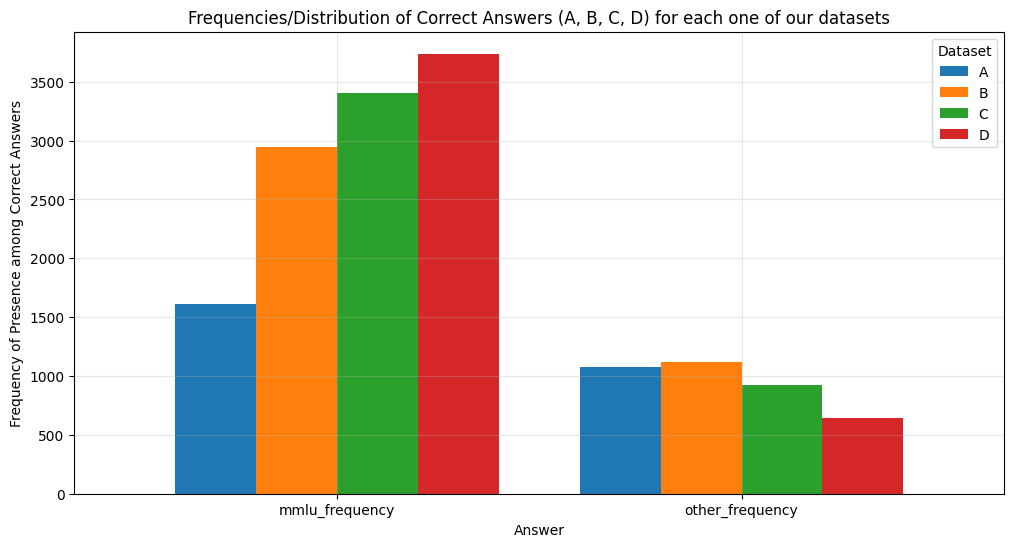

In [23]:
# Bar plot. We transposed the contingency table so that we can compare the distribution on both datasets
answer_frequencies.T.plot(kind='bar',figsize=(12,6),width=0.8)

    # Annotation
plt.title('Frequencies/Distribution of Correct Answers (A, B, C, D) for each one of our datasets')
plt.xlabel('Answer')
plt.xticks(rotation=0)
plt.ylabel('Frequency of Presence among Correct Answers')
plt.legend(title='Dataset')
plt.grid(alpha=0.3)
plt.show()

B. 

From this plot, it seems like there is an important difference in correct answers distributions accross datasets (proportion(A)<proportion(B)<proportion(C)<proportion(D) for mmlu whereas the opposite is true for other). Nevertheless, no final conclusion should be drawn solely from observation.
Let's perform some hypothesis testing to confirm or not this assumption.

Let H0 be : "Distributions of correct answers are independent of the chosen dataset", and $\chi^2$ test of independence be our statistical tool to solve this.   

In [24]:
# B

from scipy.stats import chi2_contingency

    # Perform the X^2 test
chi2_statistic, p_value, dof, expected = chi2_contingency(answer_frequencies)

    # Print relevant results
print("Chi-square Statistic:", chi2_statistic)
print("P-value:",p_value,"< 0.05")
print("Degrees of Freedom:", dof)

Chi-square Statistic: 629.3958675644751
P-value: 4.270849602795191e-136 < 0.05
Degrees of Freedom: 3


Given the p-value, it is clear now that H0 is statistically insignificant. In other words, there is very few evidence that the distributions of correct answers are similar across both datasets. 

This may be a source of concern since models responding to the questions may have different strategies or biases. For example, if one model tends to favor certain answers (choosing A more frequently), this could skew the distribution of responses in that dataset.

### 2.3 (7 pt)

Let's dive in deeper:

A. What is language model X's mean accuracy conditioned on the four answer options for each dataset?

B. Compare LM X's performance when the correct answer is "A" between the two datasets. Use a T-test with CI = 0.95. What do you conclude?

C. Compare LM X's performance when the correct answer is "A" vs. "C or D" for each dataset. Use a T-test with CI = 0.95. What do you conclude?

In [25]:
# A

x_conditional_accuracy=pd.DataFrame(columns=['Dataset','A','B','C','D'])

    # Definition of a method that computes the accuracy of a model when the given answer is the correct one
def compute_conditional_accuracy(df,ans):
    return compute_accuracy(df[df['answer']==ans])

    # Compute conditional accuracies for each model for each one of the possible answers
mmlu_accuracies=[compute_conditional_accuracy(df_mmlu[df_mmlu['model_name']=='X'],answer) for answer in ['A','B','C','D']]
other_accuracies=[compute_conditional_accuracy(df_other[df_other['model_name']=='X'],answer) for answer in ['A','B','C','D']]

    # Build our dataframe
x_conditional_accuracy.loc[len(x_conditional_accuracy)]= ['mmlu'] +mmlu_accuracies
x_conditional_accuracy.loc[len(x_conditional_accuracy)]=['other']+other_accuracies

    # Results time!! 
print("LM_X accuracies conditioned on the four answer options in %:")
x_conditional_accuracy

LM_X accuracies conditioned on the four answer options in %:


,Dataset,A,B,C,D
0,mmlu,97.268777,79.918451,70.790479,63.359187
1,other,97.402597,80.645161,67.640693,60.374415


We observe that LM_X does exceptionnally good when the expected correct answer is A whereas it does okay/good when other letters are expected.

It seems like there is some kind of sensitivity to the label/letter representing the correct answer.

On the other hand, the performances appear to be pretty similar across the two different datasets

Let's investigate these observations even further! 

B. 

To begin, we will assess whether the performances across the datasets are comparable when the correct answer is "A." To accomplish this, we will conduct a t-test, with the null hypothesis stating that the performances are similar.

In [26]:
# B

    # Extract LM_X performance at the questionnaire for both datasets
mmlu_x_a_perf =df_mmlu[(df_mmlu['model_name']=='X')&(df_mmlu['answer']=='A')]['correct']
other_x_a_perf= df_other[(df_other['model_name']=='X')&(df_other['answer']=='A')]['correct']

    # T-test
t_statistic,p_value=ttest_ind(mmlu_x_a_perf,other_x_a_perf,equal_var=False)

    # Results
print("T-statistic:",t_statistic)
print("P-value:",p_value,"> 0.05")

T-statistic: -0.21161116511164932
P-value: 0.8324287723934077 > 0.05


Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis. This indicates that there is no statistically significant difference in the performance of LM_X between the two datasets when the correct answer is "A". 

Therefore, we can conclude that LM X performs similarly across both datasets for 'A' as a specific answer choice.

In [27]:
# C

    # Extract LM X performance at the questionnaire for both datasets
mmlu_x_a_perf =df_mmlu[(df_mmlu['model_name'] == 'X')&(df_mmlu['answer']=='A')]['correct']
other_x_a_perf=df_other[(df_other['model_name']=='X')&(df_other['answer']=='A')]['correct']

    # Extract LM X performance for "C or D" for both datasets
mmlu_x_c_d_perf=df_mmlu[(df_mmlu['model_name']=='X')&(df_mmlu['answer'].isin(['C','D']))]['correct']
other_x_c_d_perf=df_other[(df_other['model_name']=='X')&(df_other['answer'].isin(['C','D']))]['correct']

    # T-tests : Null hypothesis = LM_x performs differently when we change correct answers labels
mmlu_t_statistic,mmlu_p_value =ttest_ind(mmlu_x_a_perf,mmlu_x_c_d_perf,equal_var=False)
other_t_statistic,other_p_value=ttest_ind(other_x_a_perf,other_x_c_d_perf,equal_var=False)

    # A DataFrame that will store the results
results_df= pd.DataFrame({'Dataset': ['mmlu','other'],'T-statistic':[mmlu_t_statistic,other_t_statistic],'P-value':[mmlu_p_value,other_p_value],
                           '< 0.05':[mmlu_p_value<0.05,other_p_value<0.05]})

    # Print results
results_df


,Dataset,T-statistic,P-value,< 0.05
0,mmlu,44.058837,0.000000e+00,True
1,other,25.139485,1.188005e-121,True


These results reveal a significant difference in LM_X's performance based on the correct answer type across both datasets. Specifically, when the correct answer is "A," the model performs much better than when the answer is "C or D", with p-values close to zero for both datasets. This means that LM_X is more confident in identifying "A" as the correct answer.

All in all, the observations we made in A) seem to be supported with strong statistical tools (t-test) which confirms their relevance.

### 2.4 (2 pt)

What an intriguing finding! 

A. Print the mean accuracies conditioned on the correct answer for all LMs for each dataset.

B. /Discuss:/ What do you observe?

In [28]:
# A

def compute_conditional_accuracies_for_all_models(df_mmlu,df_other):
        # Create a DataFrame to hold conditional accuracies
    conditional_accuracy_df=pd.DataFrame(columns=['Dataset','Model','A','B','C','D'])
    
        # Loop through each model
    for model in ['X','Y','Z']:
            # Compute conditional accuracies for each model for each possible answer
        mmlu_accuracies=[compute_conditional_accuracy(df_mmlu[df_mmlu['model_name']== model], answer) for answer in ['A','B', 'C','D']]
        other_accuracies= [compute_conditional_accuracy(df_other[df_other['model_name'] ==model], answer) for answer in ['A','B', 'C','D']]
        
            # Append results to the Dataframe
        conditional_accuracy_df.loc[len(conditional_accuracy_df)] =['mmlu',model]+mmlu_accuracies
        conditional_accuracy_df.loc[len(conditional_accuracy_df)]= ['other', model]+ other_accuracies

    return conditional_accuracy_df


# Results time!
conditional_accuracy =compute_conditional_accuracies_for_all_models(df_mmlu,df_other)
print("The mean accuracies conditioned on the correct answer for all LMs : ")
conditional_accuracy

The mean accuracies conditioned on the correct answer for all LMs : 


,Dataset,Model,A,B,C,D
0,mmlu,X,97.268777,79.918451,70.790479,63.359187
1,other,X,97.402597,80.645161,67.640693,60.374415
2,mmlu,Y,62.383613,68.807339,73.347047,90.425247
3,other,Y,62.523191,66.397849,76.298701,92.043682
4,mmlu,Z,64.307883,64.118247,66.911549,66.113934
5,other,Z,68.089054,66.756272,66.233766,67.706708


B. /Discuss:/

Similarly to LM_X, we observe a bias in LM_Y's performance towards the chosen letter/label across the two datasets. Specifically, the accuracy improves as the correct answer varies from A to D, with LM_Y performing better for answers like D compared to A. Moreover, LM_Y's performance remains consistent between the two datasets.

On the other hand, LM_Z appears less sensitive to both the letter choice and the dataset. The accuracies for LM_Z remain relatively stable across all answer options (A, B, C, D) and show little variation between the mmlu and other datasets. It means that LM_Z's performance is more uniform and does not exhibit the same fluctuations in accuracy as seen with LM_X and LM_Y.

### 2.5 (2 pt)

Concerned with your findings so far, you quickly consult with Ms. Sakota. After thinking it over, Ms. Sakota concludes that more tests are needed. She orders a second round of MMLU results. However, the clever Ms. Sakota thinks of the following twist: while keeping questions fixed, she randomly permutes the position of the correct answer. The new results can be found in the folder `data/task_2_5/`:
```
task_2_5/
│
└── lm_scores_mmlu_shuffle.csv
```

/Discuss:/ Why would Ms. Sakota do this?

/Discuss:/

Ms. Sakota shuffled the positions of the correct answers to eliminate any potential bias from the models favoring specific answer labels (A, B, C, D). By randomizing the positions, she wants to check if the models’ performance is truly based on understanding the questions or if they're simply more likely to predict a letter in particular. If the performance changes after the shuffle, it means that the models were biased towards certain labels. If it stays the same, it confirms the models are solving the tasks correctly, without focusing on the label representing the correct answer.

### 2.6 (4 pt)

Increasingly sceptical of the language models' performance, you read up on proper testing practices. You stumble upon the concept of [test-rested stability](https://en.wikipedia.org/wiki/Repeatability), which roughtly states that:

"_Measurements taken by a single person or instrument on the same item, under the same conditions, and in a short period of time, should have the same results._"

In our case, we would assume an LM would have the same performance on a given question regardless of the correct answer position. One way of testing this is by using the following metric:

$$\text{test-retest metric} = \frac{1}{N}\sum_{i=1}^N \frac{1}{M}\sum_{j=1}^M c^i_0 c_j^i,$$

where $c^i_0 \in \{0, 1\}$ indicates whether the model answers the $i^{\text{th}}$ question correctly (1 if correct, 0 if incorrect). $c_j^i$ indicates whether the model answers the $i^{\text{th}}$ question correctly in the $j^{\text{th}}$ shuffled version of the answer label content. Finally, $M$ is the total number of shuffles and $N$ is the dataset size.

Task: compute the test-retest metric for each language model using the original `lm_scores_mmlu.csv` file and the new `lm_scores_mmlu_shuffle.csv` file. Using a bar plot, visualize your results by comparing the accuracy of the original `lm_scores_mmlu.csv` and the test-retest scores.

**hints**
- what is $M$ in our case?

(bonus: no points, but so much sweet, sweet knowledge - check out [the following article](https://arxiv.org/pdf/2406.19470v1))

In [29]:
    # Load the shuffled version of mmlu
df_mmlu_shuffle = pd.read_csv('task_2_5/lm_scores_mmlu_shuffle.csv')

In [30]:
# Given a model (X, Y or Z), a dataframe and its shuffled version (M=1), the method computes the test-retest metric
def compute_test_retest(model, original_df,shuffled_df):
        # Extract the correct answers for the specified model in both the original and shuffled datasets
    original_df_correct =original_df[original_df['model_name']==model]['correct']
    shuffled_df_correct= shuffled_df[shuffled_df['model_name']==model]['correct']
    
        # The & operator is equivalent to the product we have in the formula above
    checked_correct_version= original_df_correct&shuffled_df_correct
    
        # Return the mean of the checked correct answers
    return np.mean(checked_correct_version)*100

    # Build a comparison dataframe that will hold the test-retest scores and the original accuracies as well
comparison_df = pd.DataFrame(columns=['Assessment Method','X','Y','Z'])
comparison_df.loc[len(comparison_df)]=['test-retest']+[compute_test_retest(model,df_mmlu, df_mmlu_shuffle) for model in ['X','Y','Z']]
comparison_df.loc[len(comparison_df)]=['original_accuracy']+[compute_accuracy(df_mmlu[df_mmlu['model_name']==model]) for model in ['X','Y','Z']]

    # Results
print("The values of the test-retest metric and the accuracy for each one of the models:")
comparison_df


The values of the test-retest metric and the accuracy for each one of the models:


,Assessment Method,X,Y,Z
0,test-retest,58.840629,57.164843,44.160397
1,original_accuracy,74.358755,76.154241,65.595075


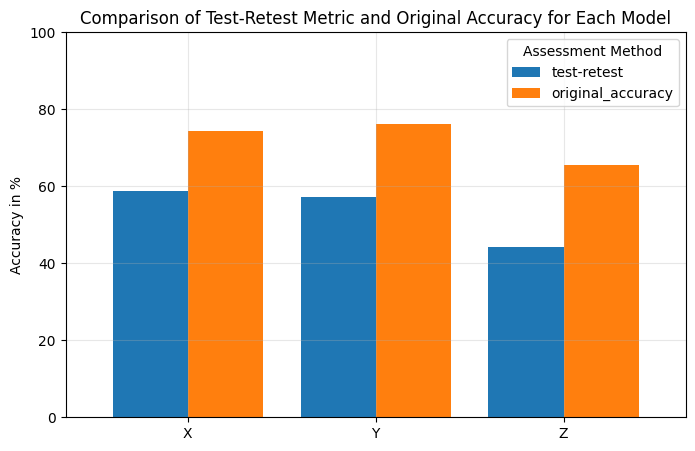

In [31]:
    # Plot the bar chart to visualize the comparison
comparison_df.set_index('Assessment Method',inplace=True)
comparison_df.T.plot(kind='bar',figsize=(8,5),width=0.8)

    # Annotations
plt.ylabel('Accuracy in %')
plt.title('Comparison of Test-Retest Metric and Original Accuracy for Each Model')
plt.ylim(0,100)
plt.xticks(rotation=0)
plt.grid(alpha=0.3)
plt.legend(title='Assessment Method')

    # Display the plot
plt.show()

The test-retest metrics reveal a notable decline in performance for all three models (X,Y,and Z) when the positions of correct answers are shuffled. Specifically, Model X's original accuracy of approximately 74.36% drops to around 58.84%, while Model Y's accuracy decreases from 76.15% to 57.16%. Model Z experiences a similar drop, falling from 65.60% to about 44.16%. Despite these reductions, all models still maintain accuracy levels above the naive guessing benchmark of 25% (4 possible choices A,B,C or D). It means that while the position of correct answers affects the models' performance, they retain some predictive capability, indicating that their accuracies are not solely reliant on the answer positioning.

### 2.7 (2 pt)

A. Using the unshuffled data: For each LM, print the distribution of the answers they give as well as the accuracy conditioned on the answer they give.

B. /Discuss:/ Describe what you observe

[bonus: not scored, but again _that sweet, sweet knowledge_] Could you think of a plausible explanation?

In [32]:
# A
    # Method that will compute the distributions of the answers for the different models
def answers_distribution(df):
    answers_distribution = pd.DataFrame(columns=['model','A','B','C','D'])
    for model in ['X','Y','Z']:
            # Get the result column
        answers = df[df['model_name']==model]['result']
            # Count the occurences
        answers_distribution.loc[len(answers_distribution)]=[model]+[len(answers[answers==label]) for label in ['A','B','C','D']]
    return answers_distribution

    # Results
print("Distribution of the answers given by the LMs:")
answers_distribution(df_mmlu)


Distribution of the answers given by the LMs:


,model,A,B,C,D
0,X,4259,2659,2409,2369
1,Y,1072,2256,3015,5353
2,Z,2176,2885,3237,3398


In [33]:
# Method that builds a df that will be holding the conditional accuracies for each model and for all possible labels
def conditional_accuracy_on_the_result(df):
    conditional_accuracy_on_the_result = pd.DataFrame(columns=['model','A','B','C','D'])
    for model in ['X','Y','Z']:
            # Get model-specific data
        model_specific_df = df[df['model_name']==model]
            # Compute the conditional accuracy on the chosen answer
        conditional_accuracy_on_the_result.loc[len(conditional_accuracy_on_the_result)]=[model]+[compute_accuracy(model_specific_df[model_specific_df['result']==label]) for label in ['A','B','C','D']]
    return conditional_accuracy_on_the_result


    # Results
print("The models accuracies (in %) conditionned on each possible answer")
conditional_accuracy_on_the_result(df_mmlu)


The models accuracies (in %) conditionned on each possible answer


,model,A,B,C,D
0,X,36.792674,88.454306,100.00000,100.000000
1,Y,93.750000,89.760638,82.78607,63.160844
2,Z,47.610294,65.407279,70.34291,72.748676


B. /Discuss/:

*Distributions:
Model X primarily favors 'A' resulting in an uneven distribution of answers, with 'C' and 'D' being chosen less often. In contrast, Model Y predominantly selects 'D' as its top choice, while it opts for 'A' the least. Model Z, on the other hand, presents a more balanced distribution across all answer options, showing no clear preference for any specific label.

*Accuracies:
Model X achieves a perfect accuracy of 100% for both 'C' and 'D' but its accuracy for 'A' is notably low at just 36.79%, indicating a tendency to make mistakes when selecting that option. Model Y performs exceptionally well with a 93.75% accuracy for 'A', but its performance drops to 63.16% for 'D' highlighting a struggle with that answer. Meanwhile, Model Z has a respectable accuracy of 72.75% for 'D', but overall, it doesn't quite reach the levels of performance seen in the other two models.

*Conclusion:
These results show that models X and Y, in particular, display a strong bias toward specific answer choices, leading to an uneven distribution of selections and lower accuracy for some options.

Bonus

Possible explanations:

It appears that the training procedures for the language models emphasized the importance of selecting the correct label, possibly treating the label choice as a significant factor influencing the correct answer. This focus may have led to biases in their predictions, where certain labels are favored over others, thereby affecting the overall accuracy.

We also observe that the frequency of answers tends to increase or decrease almost linearly from 'A' to 'D' in models X and Y. This pattern may come from how the labels were encoded during training, as we're working with categorical data. The encoding process might have implicitly introduced a false hierarchy among the choices, leading to a bias that often favors either the first choice ('A') or the last choice ('D') 

## Task 3 (16 points): What do Questions and Answers look like for a Language Model?

While you feel pretty good about the tests you conducted so far, something still bothers you: what if the language models don't see the data like you do? Suddenly, you receive a phone call from a wise AI sage in the West, _Westoda_:

```
"Hmm, correct you are, young padawan, to question how the world is seen by large language models! Simple 'text' it is not, hmm? No, no, no! Characters and words, the way of puny humans, this is not, heh heh heh.

'Tokens', they use, yes! Mysterious and powerful, these tokens are. Expand our vocabulary, they do, beyond the simple 'a to Z'. Chunky blocks of text, they become, yes! 'Hello world', a simple phrase it may seem. But to a language model, '[24912, 2375]' it might appear, yes! Confusing, it is, hmm?

Wise, it would be, to explore these MMLU data points through the eyes of a language model, you think? Yes, yes! Much to learn, there is. The ways of the tokens, understand you must, if truly comprehend the great LMs, you wish to.
Meditate on this, you should. The force of natural language processing, strong it is. But patience, you must have, my young padawan. For only through great study and contemplation, will the mysteries of the tokens reveal themselves to you, they will. Yes, hmmm!"
```

Admittingly, Westoda at times speaks in riddles… However, he was explaining a crucial aspect of modern LMs called [Tokenization](https://learn.microsoft.com/en-us/dotnet/ai/conceptual/understanding-tokens):


“Tokens are words, character sets, or combinations of words and punctuation that are used by [language models (LMs)] to decompose text into. Tokenization is the first step in training”

Instead of characters, LMs process natural language using “tokens”. While this is useful for a number of reasons, it does at times introduce some “unintuitive” behavior…

In [34]:
# PROVIDED CODE

try:
    import tiktoken
except Exception as e:
    print('installing tiktoken package')
    
    %pip install tiktoken
    
    import tiktoken

def tokenize_text(s):
    enc = tiktoken.encoding_for_model('gpt-4o')
    tokens = enc.encode(str(s))
    return tokens

example_string = 'hello world'
print(f'humans see: "{example_string}" --> language models see: {tokenize_text(example_string)}')

humans see: "hello world" --> language models see: [24912, 2375]


### 3.1 (5 pt)

Use the provided code in the cell above to "see the world through the eyes of a language model":

A. Tokenize the questions of the original MMLU data provided in task 1: `task_1/mmlu_data/test.csv` and plot the token distribution (the frequency of each token).

B. Same as (A), but now for the answers in columns (columns "A", "B", "C", and "D").

C. Isolate the tokens for the strings "A", "B", "C", and "D", then, for their occurances in both questions and answers, print their relative distribution to each other.

**hint**
- There are a _lot_ of tokens, consider using a cutoff point and log scale
- For (c), they should sum to 1

In [35]:
# A

    # Definition of a method that computes the distribution of tokens inside the tokenized version of each element of the iterable 'column'
        # Token_value controls the display of the decoded version of the token.
def get_token_dist(column,token_value=False):
    tokens_history=[]
    for text_cell in column:
        tokens=tokenize_text(text_cell)
            # Merge current tokens with previous ones
        tokens_history+=tokens 
        # Compute tokens occurences
    token_distribution=pd.Series(tokens_history).value_counts(normalize=False).reset_index()
    token_distribution.rename(columns={'index':'token'},inplace=True)    
        # If we want to decode the token
    if token_value:
        dist=pd.DataFrame(token_distribution)
            # We got inspiration from tokenize_text method
        enc=tiktoken.encoding_for_model('gpt-4o')
        dist['token_value']=dist['token'].apply(lambda x: enc.decode([x]))
        return dist
    return pd.DataFrame(token_distribution)

In [36]:
    # Token Distribution for the 'question' column of our df_test dataframe
token_dist=get_token_dist(df_test['question'], token_value=True)

    # Result
print("The most present tokens within the question column are :")
token_dist.head()

The most present tokens within the question column are :


,token,count,token_value
0,290,51757,the
1,328,28016,of
2,11,27562,","
3,13,22715,.
4,316,18561,to


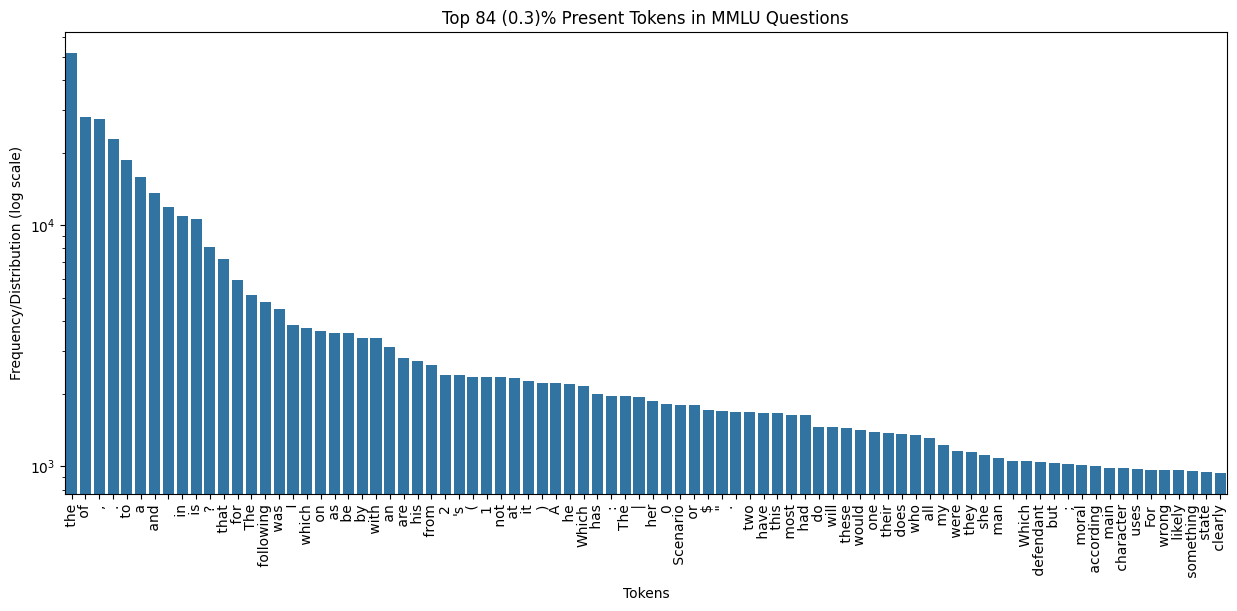

In [37]:
# Plot the tokens frequencies having a frequency/ratio (%) > cutoff
def plot_token_frequencies(token_freq,cutoff_ratio,col_name,token_value=False):
        # We compute the number of tokens we'll be displaying knowing the cutoff ratio and the total number of tokens
    number_of_tokens = int((cutoff_ratio/100)*len(token_freq))
    plt.figure(figsize=(15,6))
        # If we want to display the decoded versions of the tokens instead of not so meaningful IDs
    if token_value:
        sns.barplot(x='token_value',y='count',data=token_freq[:number_of_tokens],order=token_freq[:number_of_tokens]['token_value'])
    else: 
        sns.barplot(x='token',y='count',data=token_freq[token_freq['count']>number_of_tokens],order=token_freq[token_freq['count']>number_of_tokens]['token'])
        # Matplotlib config
    plt.xticks(rotation=90)
    plt.xlabel('Tokens')
    plt.ylabel('Frequency/Distribution (log scale)')
    plt.yscale('log')   # log scale
    plt.title(f'Top {number_of_tokens} ({cutoff_ratio})% Present Tokens in MMLU '+col_name)
    plt.show()


    # Now let's see what the distribution looks like for MMLU questions (we take the top 0.3% tokens)
token_distribution = get_token_dist(df_test['question'],token_value=True)
plot_token_frequencies(token_distribution, cutoff_ratio=0.3, col_name = 'Questions', token_value=True)

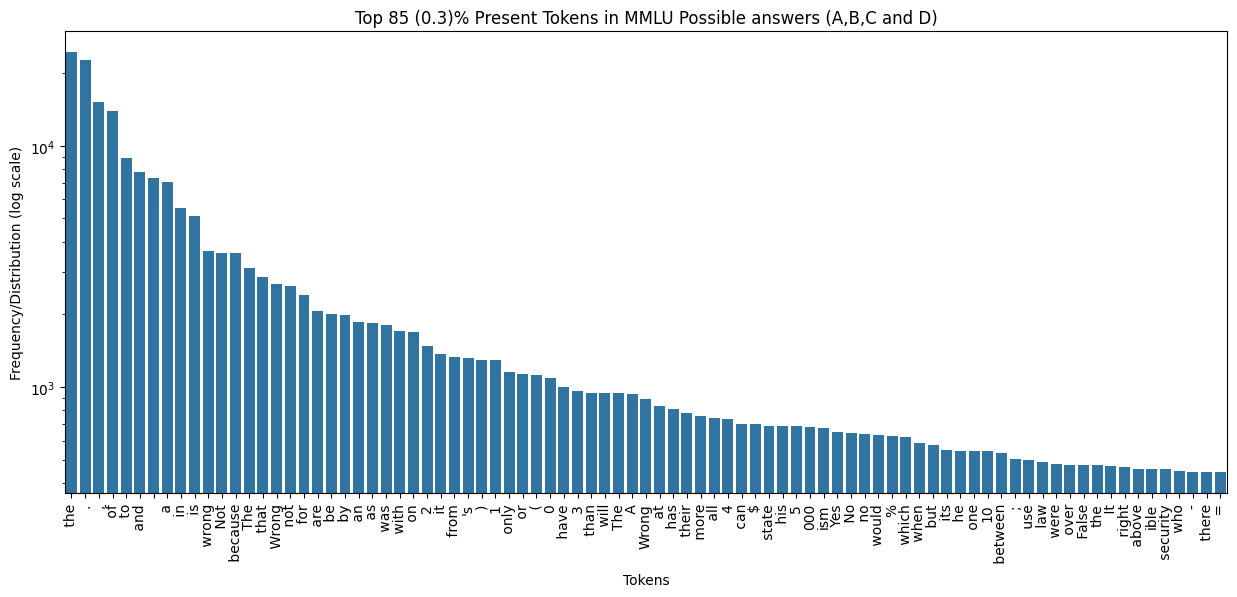

In [38]:

# B
    # We build a concatenated version of the possible answers
concatenated_answers=df_test['A']+' '+df_test['B']+' '+df_test['C']+' '+df_test['D']
    # Compute the tokens distribution in this case
tokens_frequencies_answers=get_token_dist(concatenated_answers,token_value=True)
    # Plot the results for answers A,B,C and D
plot_token_frequencies(tokens_frequencies_answers,cutoff_ratio=0.3,col_name='Possible answers (A,B,C and D)',token_value=True)

In [39]:
# C

# Method that preserves only the distribution of the wanted tokens
def filter_token_distribution(token_dist_df, target_tokens):
        # Filter only tokens corresponding to A,B,C, or D
    return token_dist_df[token_dist_df['token_value'].isin(target_tokens)]

# Main function to calculate and print relative distributions for the different labels
def compute_relative_distribution(df):
        # Compute token distributions for questions and answers separately
    question_token_dist=get_token_dist(df['question'],token_value=True)
    answer_token_dist=get_token_dist(concatenated_answers,token_value=True)

        # Create a new column merging question and answer columns (merged = question + possible answers)
    df_copy = df.copy()
    df_copy.loc[:,'merged']=df['question']+' '+concatenated_answers
    merged_token_dist=get_token_dist(df_copy['merged'],token_value=True)

        # Define our target tokens
    target_tokens=['A','B','C','D']

        # Filter token distributions for these target tokens
    question_token_filtered=filter_token_distribution(question_token_dist,target_tokens).copy() # to avoid warnings
    answer_token_filtered=filter_token_distribution(answer_token_dist,target_tokens).copy()
    merged_token_filtered=filter_token_distribution(merged_token_dist,target_tokens).copy()

        # Calculate the relative distributions (normalized counts) for questions,answers,and our new merged column
    question_token_filtered.loc[:,'relative_distribution']=question_token_filtered['count']/question_token_filtered['count'].sum()
    answer_token_filtered.loc[:,'relative_distribution']=answer_token_filtered['count']/answer_token_filtered['count'].sum()
    merged_token_filtered.loc[:,'relative_distribution']=merged_token_filtered['count']/merged_token_filtered['count'].sum()

        # Build our results DataFrame
    summary_df =pd.DataFrame({
        'Token':target_tokens,
        'Question Distribution':question_token_filtered['relative_distribution'].values,  # If we consider only questions
        'Answers Distribution':answer_token_filtered['relative_distribution'].values,      # answers only 
        'Merged Distribution':merged_token_filtered['relative_distribution'].values       # for each (question, answer) pair
    })

        # Add a row for sums to check if they sum to 1
    total_row =pd.DataFrame({
        'Token':['Total'],
        'Question Distribution':[question_token_filtered['relative_distribution'].sum()],
        'Answers Distribution':[answer_token_filtered['relative_distribution'].sum()],
        'Merged Distribution':[merged_token_filtered['relative_distribution'].sum()]
    })

        # Concatenate the total row to the summary DataFrame
    summary_df = pd.concat([summary_df, total_row], ignore_index=True)

    return summary_df


    # Results time!!
result_df = compute_relative_distribution(df_test)
print("The relative distributions of A,B,C and D within questions alone, answers alone and within each pair of those two :")
result_df

The relative distributions of A,B,C and D within questions alone, answers alone and within each pair of those two :


,Token,Question Distribution,Answers Distribution,Merged Distribution
0,A,0.905521,0.536859,0.854996
1,B,0.041718,0.259615,0.075883
2,C,0.031902,0.113782,0.043201
3,D,0.020859,0.089744,0.025920
4,Total,1.000000,1.000000,1.000000


Let's try to illustrate these results with a pie representation instead:

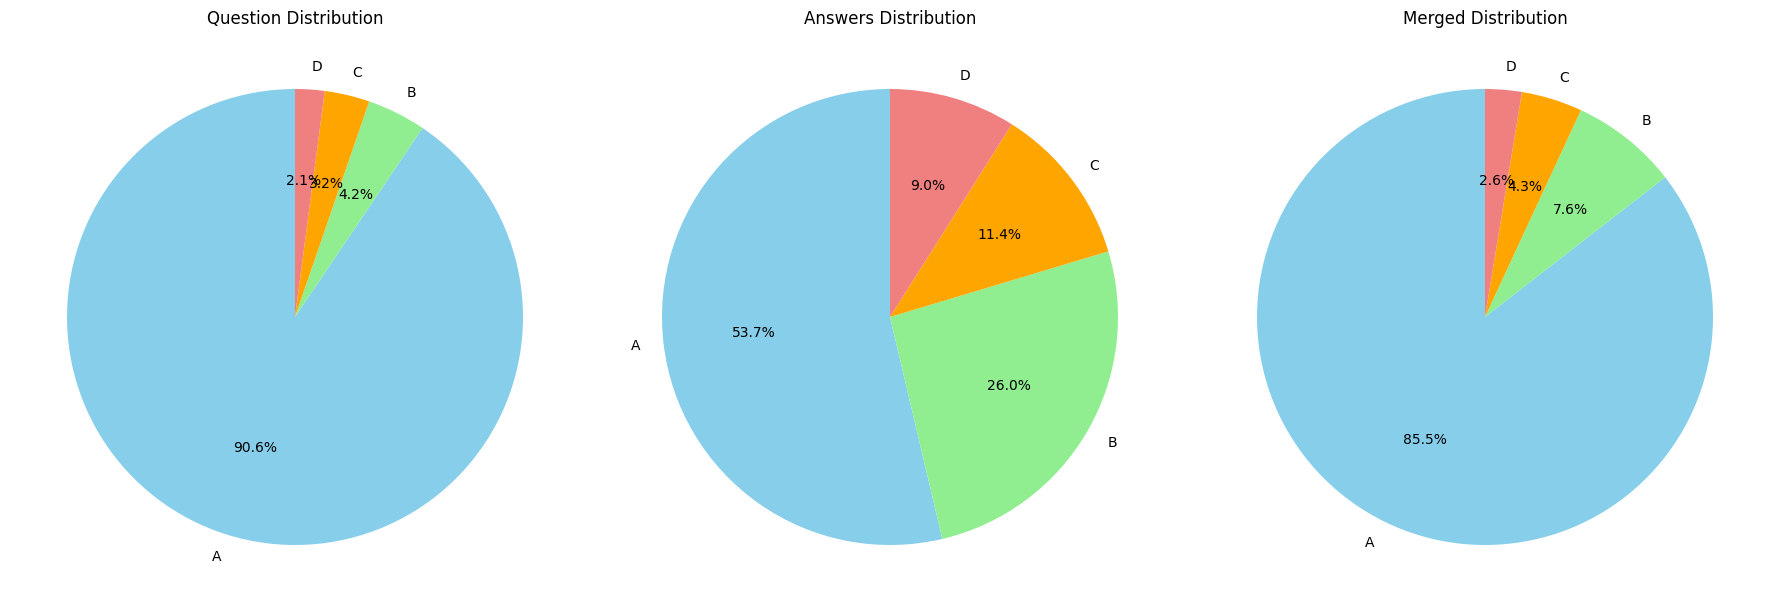

In [40]:

# Function to plot pie charts for the relative distribution
def plot_pie_charts(df):
        # Extract the relative distributions for each case
    meaningful_rows=(df['Token']!='Total')
    question_distribution=df.loc[meaningful_rows,'Question Distribution']
    answers_distribution=df.loc[meaningful_rows,'Answers Distribution']
    merged_distribution=df.loc[meaningful_rows,'Merged Distribution']
    labels=df.loc[meaningful_rows,'Token']
    
        # Titles for the plots
    titles =['Question Distribution','Answers Distribution','Merged Distribution']
    
        # We create subplots in order to merge the three figures into one
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

        # Some colors
    colors =['skyblue', 'lightgreen', 'orange', 'lightcoral']
    
        # Pie chart for the question distribution
    axes[0].pie(question_distribution,labels=labels,autopct='%1.1f%%',startangle=90,colors=colors)
    axes[0].set_title(titles[0])
    
        # Pie chart for the answers distribution
    axes[1].pie(answers_distribution,labels=labels,autopct='%1.1f%%',startangle=90,colors=colors)
    axes[1].set_title(titles[1])
    
        # Pie chart for the merged distribution
    axes[2].pie(merged_distribution,labels=labels,autopct='%1.1f%%',startangle=90,colors=colors)
    axes[2].set_title(titles[2])
    
        # Display the pie charts
    plt.tight_layout()
    plt.show()

    # Results
plot_pie_charts(result_df)


Conclusion :

The results show that the token "A" appears much more often than the others, especially in the questions, where it makes up over 90% of the total. In the answers, "A" is still the most frequent but drops to about 53%, while "B" becomes more common, showing up almost 25% of the time. Tokens "C" and "D" are used less often in both questions and answers.

It means that questions tend to focus heavily on "A", possibly hinting at a bias in how they're structured. Answers, while still dominated by "A", show a bit more variety with "B" appearing more frequently than in the questions.

This can possibly justify the potential bias in A we're witnessing in LM_X's performances.

### 3.2 (3 pt)

What if the number of "A", "B", "C", and "D" tokens in the question and answer pairs could influence a language model's decisions?

A. For each combined question-answers pair, compute: 
1. the number of "A", "B", "C", and "D" tokens; and
2. the total number of tokens.
3. then, group by the "correct" answer and compute the mean frequency of A, B, C, and D tokens and the total number of tokens. 
4. finally, print your results

B. /Discuss:/ What do you think of the hypothesis that the frequency of A, B, C, and D tokens could influence answers?


In [41]:
# A

  # Extract the tokens for A,B,C and D
id_A=tokenize_text("A")[0]
id_B=tokenize_text("B")[0]
id_C=tokenize_text("C")[0]
id_D=tokenize_text("D")[0]

  # Helper method that counts the number of As,Bs,Cs,and Ds and the total number of tokens in a given text.
def count_abcd_tokens(text):
    tokens=tokenize_text(text)
    a_count=tokens.count(id_A)
    b_count=tokens.count(id_B)
    c_count=tokens.count(id_C)
    d_count=tokens.count(id_D)
    total_tokens=len(tokens)
    return a_count,b_count,c_count,d_count,total_tokens


  # Method that computes the mean frequency of A,B,C and D and the total number of tokens for each question-answers pair, grouped by the correct answer.
def compute_abcd_token_frequencies(df):
      # To avoid modifying the original dataset
    df_copy=df.copy()
    df_copy['combined_answers']=df_copy['A']+' '+df_copy['B']+' '+df_copy['C']+' '+df_copy['D']

      # Apply the counting function to each row (concatenating question and combined_answers)
    df_copy[['A_count', 'B_count', 'C_count', 'D_count', 'total_tokens']]= df_copy.apply(
        lambda row: pd.Series(count_abcd_tokens(row['question'] +' ' +str(row['combined_answers']))), axis=1)
    
      # Group by the correct answer and compute the mean frequencies
    grouped =df_copy.groupby('answer')[['A_count', 'B_count', 'C_count', 'D_count', 'total_tokens']].mean()

    return grouped


  # Results
result =compute_abcd_token_frequencies(df_test)
print("The mean frequencies of A,B,C and D within question-answers pairs conditioned on the correct response are:")
result

The mean frequencies of A,B,C and D within question-answers pairs conditioned on the correct response are:


,A_count,B_count,C_count,D_count,total_tokens
answer,,,,,
A,0.157045,0.007138,0.012725,0.004345,92.798262
B,0.167244,0.010976,0.010976,0.004910,88.592143
C,0.158012,0.009771,0.016192,0.005304,92.424065
D,0.165784,0.005032,0.017214,0.005032,91.817267


Conclusion:

The average counts for the tokens A,B,C and D reveal that A is mentioned significantly more often than the others in the question-answer pairs, which may have a strong influence on shaping the responses. While B shows the second highest average when it's the correct answer, the counts for C and D are notably lower. 

The total number of tokens remains relatively stable, indicating similar lengths in questions and answers. 

This heavy reliance on A raises concerns about bias, as it may lead the language model to favor this option over others, potentially skewing its accuracy and affecting the overall performance of its predictions.


B. 

This seems like a completely legitimate question to ask ourselves since LMs see sentences as a sequence of tokens rather than a list of words steering us toward a specific meaning or explanation. Therefore, LMs would rely on mathematical and algorithmic methods to predict potential answers. One (not so naive) way to do so is by considering the distribution of potential answers and focusing on the most frequent ones when making predictions. Especially that we do not control very well the different patterns a LM may learn since their architecture is based on neural networks (black-boxes).

While this may cause a major concern for training datasets shaped like df_test that favors certain labels, it’s factual that LMs have become increasingly sophisticated over time and may learn more advanced patterns rather than a simple token presence maximization.

Nevertheless, it's worth mentioning that the higher frequency of A tokens across all question types is likely due to thee fact that more English sentences contain the letter A. For instance, we may consider sentences like 'A subset H of a group (G,*) is a group if' or 'A pulse may be felt on a patient's face where the...'. 

### 3.3 (4 pt)

Three of the most important considerations when deciding between language models are:

Quality
Costs
Speed

So far, much of your analysis has focused on quality. However, the government has indicated that they are quite concerned about both the total costs and speed as well. Specifically, it has been brought to their attention that a new `turbo` model has been launched! 

This model is both cheaper and faster than the models you evaluated so far. However, there is a catch: the context length* is much smaller than that of the other LMS. Namely, it can only process **300** tokens during inference. Meanwhile, the other models can process up to 100K tokens! 

*_The “context length” refers to the number of tokens that can be given to an LM as input._

A. Are there subjects where using the cheaper model might be problematic? I.e., where part of the question and answer(s) might not fit completely in the context?

B. /Discuss:/ Can you think of a strategy that would balance the needs of the government?

**hint**:
- An LM needs to have both the question and the different answer options in its context

Let's explore which subjects might not be suitable for our turbo model using a plot. To do this, we’ve taken a worst-case scenario approach, focusing on subjects where the maximum context length exceeds the 300-token limit. This way, we can be confident that no questions in those subjects will be misjudged as fitting within the cheaper model when they actually don't.

Additionally, we’ll display the distribution of tokens between the question and answers in each context to identify potential areas for optimization.

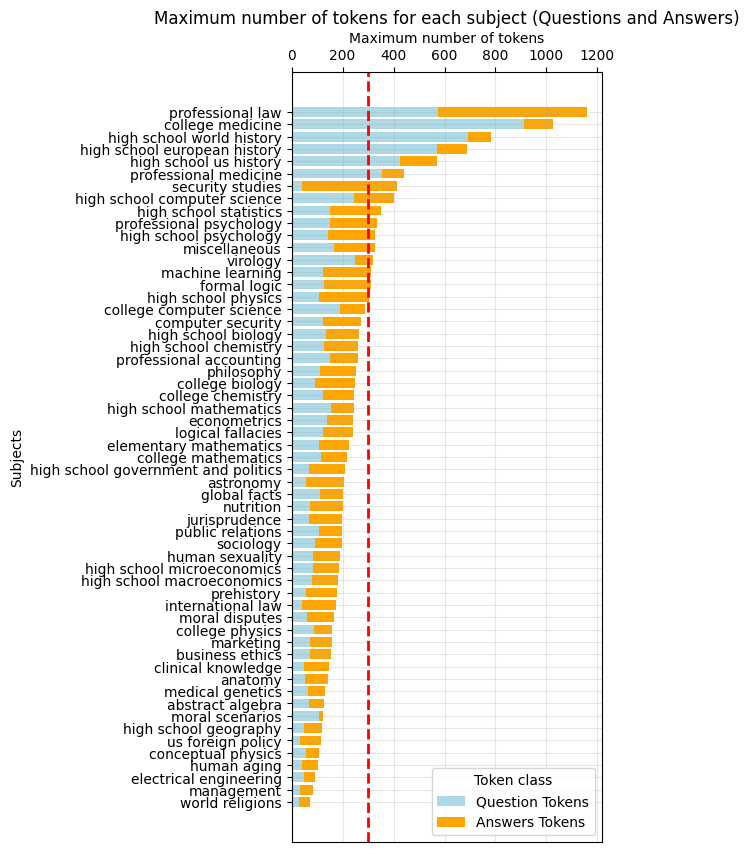

In [42]:
# A
        # Calculate the token numbers
question_token_number =df_test['question'].apply(lambda x:len(tokenize_text(x)))
answer_A_token_number =df_test['A'].apply(lambda x:len(tokenize_text(x)))
answer_B_token_number= df_test['B'].apply(lambda x:len(tokenize_text(x)))
answer_C_token_number =df_test['C'].apply(lambda x:len(tokenize_text(x)))
answer_D_token_number=df_test['D'].apply(lambda x:len(tokenize_text(x)))

        # Total answer token count (of course we could have concatenated the answer and computed the length of the tokenized version)
answer_token_number =answer_A_token_number+answer_B_token_number+answer_C_token_number+answer_D_token_number
total_token_number=question_token_number+answer_token_number

        # Build our df
df_with_tokens =pd.concat([df_test, pd.DataFrame({
    'question_token_number':question_token_number,
    'answer_token_number':answer_token_number,
    'total_token_number':total_token_number
})],axis=1)

        # Group by subject and calculate max for both question and answer tokens
max_token_distribution_by_subject =df_with_tokens.groupby('subject')[['question_token_number','answer_token_number']].max().reset_index()

        # Sort by the total number of tokens in ascending order
max_token_distribution_by_subject['total_token_number'] =max_token_distribution_by_subject['question_token_number']+max_token_distribution_by_subject['answer_token_number']
max_token_dist_by_subject=max_token_distribution_by_subject.sort_values(by='total_token_number',ascending=True)

        # Initialize our subplots
fig,ax= plt.subplots(figsize=(4,10))

        # Plot the question tokens first (base layer)
ax.barh(max_token_dist_by_subject['subject'], 
        max_token_dist_by_subject['question_token_number'], 
        color='lightblue',label='Question Tokens')

        # Plot the answer tokens on top (stacked)
ax.barh(max_token_dist_by_subject['subject'], 
        max_token_dist_by_subject['answer_token_number'], 
        left=max_token_dist_by_subject['question_token_number'], 
        color='orange',label='Answers Tokens')

        # Customize the plot
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.axvline(x=300,color='red',linestyle='--',linewidth=2)
plt.title('Maximum number of tokens for each subject (Questions and Answers)')
plt.ylabel('Subjects')
plt.xlabel('Maximum number of tokens')
plt.grid(True,alpha=0.3)
plt.legend(title='Token class',loc='lower right')
plt.show()


In [43]:
    # Get the subjects exceeding the 300-token limit
subjects_exceeding_300= max_token_distribution_by_subject[max_token_distribution_by_subject['total_token_number']>300]

    # Compute the percentage of subjects exceeding the limit
percentage_exceeding_300= (len(subjects_exceeding_300)/len(max_token_distribution_by_subject))*100

    # Result
print(f"Percentage of subjects exceeding the 300-token limit: {percentage_exceeding_300}%")

Percentage of subjects exceeding the 300-token limit: 28.07017543859649%


We observe that over 70% of the subjects are likely to be well-suited for our faster, more cost-effective turbo model, staying within the 300-token limit. However, the remaining 30% of subjects pose a risk of exceeding this threshold.

B .

One possible approach is to use the turbo model for the 72% of subjects that stay within the 300-token limit, while reserving more advanced models for the remaining cases.

However, an interesting observation from the previous plot is that many of the subjects exceeding the token threshold tend to have longer answers compared to the questions. Let's investigate this even further :

In [44]:
    # Look for subjects having the answers length longer than the question part
subjects_having_long_answers= subjects_exceeding_300[subjects_exceeding_300['answer_token_number']/subjects_exceeding_300['question_token_number']>0.5]

    # Compute the ratio
percentage_long_answers= (len(subjects_having_long_answers)/len(subjects_exceeding_300))*100

    # Result
print(f"Percentage of subjects having a longer answer part than the question: {percentage_long_answers}%")

Percentage of subjects having a longer answer part than the question: 62.5%


Our investigation revealed that 62.5% of the subjects exceeding the 300-token limit tend to have a longer answer portion compared to the question itself. Given that more sophisticated models can handle up to 100k tokens, while the turbo model is limited to 300 tokens, we can estimate that the turbo model is approximately $\alpha \frac{100k}{300}$ times cheaper (with $\alpha$ ranging between 0 and 1 depending on the scenario). This means that even if we need to ask several questions, using the turbo model will still be significantly more cost-effective than using the more advanced models.

In light of this, we suggest a strategy to further optimize the token usage: reduce the size of the answers and break down the task into multiple questions. Instead of structuring the context as "question + option A + option B + option C + option D" all at once, we can split it into separate, simpler queries. For instance, instead of sending the entire set of options at once, we could ask multiple yes/no questions like "Is the correct answer between Value_of(A) and Value_of(B)?" or "Is the correct answer Value_of(A)?" followed by similar questions for the other options.

By doing this, we take advantage of the fact that asking multiple smaller questions is still much cheaper than allowing the context to exceed the 300-token limit. This approach could substantially cut costs while maintaining comparable accuracy, leveraging the turbo model's efficiency without drastically sacrificing the quality of predictions for the more complex subjects.

### 3.4 (4 pt)

/Discuss:/ The time has come to give your final recommendation on the use of LMs in education to the government! Taking into account everything you analyzed in all the preceding tasks (1, 2, and 3), please write a short recommendation consisting of 4 bullet points discussing your concerns.

**hint**
- Try to use the MECE framework: _Mutually Exclusive Collectively Exhaustive_

/Discuss:/

1. Test-Retest Consistency and Question Order Bias: There is evidence that the order of questions and token frequencies (for instance A being more frequent) could influence the model’s decisions, which raises concerns about consistency and potential bias. We recommend adding variability (like shuffling the labels representing the answers) during test-retest scenarios to ensure that models provide reliable results, regardless of token distribution or label frequency.

2. Accuracy and Category Balance: Our analysis suggests that model accuracy can be skewed when there is an imbalance in the categories of correct answers. To improve the model's performance, it is crucial to ensure a balanced distribution of correct answers across all categories. This reduces any inherent bias and enhances the model’s ability to generalize across different topics and questions.

3. Cost-Efficiency of Turbo Models: The turbo model, being cost-efficient for about 70% of cases within the 300-token limit, presents an appealing option for many educational tasks. However, for the remaining 30%, particularly subjects with longer contexts, more advanced models are necessary to avoid truncating valuable information. While investing in these models is vital for ensuring comprehensive education, creative solutions such as reducing answer lengths, breaking down long questions into smaller components, or structuring questions differently can extend the usefulness of the turbo model, thus optimizing cost without sacrificing quality.

4. Educational Equity and Ethical Use: It is crucial to consider the ethical implications of using language models in education. While these models can support personalized learning, there is a risk of reinforcing biases present in the data. To ensure fairness, educators should actively monitor model performance to identify and correct any signs of bias or inequity. Additionally, it is vital to view these models as tools to augment, **not replace**, human educators. They should be employed to enhance the learning experience while maintaining the essential role of teachers in providing guidance, critical thinking, and emotional support for students.